In [ ]:
!pip install Pillow==10.1.0 torch==2.1.2 torchvision==0.16.2 transformers==4.40.0 sentencepiece==0.1.99

In [3]:
!pip install pytesseract

In [14]:
!pip install opencv-python

In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

In [2]:
import cv2
import matplotlib.pyplot as plt


In [3]:
from transformers import pipeline

nlp = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)


C:\Users\rakti\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [14]:
ques=["What is the name of the store?","What is the address of the store?","What is the total or subtotal bill amount?"]
answers=["Name of store","Address of store","Total amount"]
imgs=[1,2,3,4,5,7,14,16,17]
out=[]
for i in imgs:
    ans=""
    image_path=f"images/{i}.jpg"
    for q in range(len(ques)):
        res=nlp(image_path,ques[q])
        #print(res[0]["answer"])
        ans+=answers[q]+":"+res[0]["answer"]+"\n"
    out.append(ans)

Name of store:“TRADER JOE'S
Address of store:2001 Greenville Ave Dallas TX 75206
Total amount:$38.68



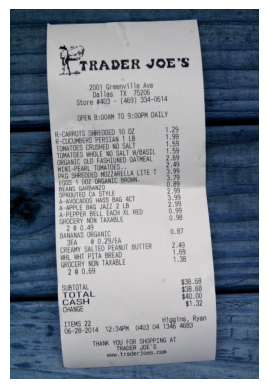

In [15]:
plt.imshow(cv2.imread("images/1.jpg"))
plt.axis('off')
print(out[0])

Name of store:survey.walmart
Address of store:951 _AVENIDA PICO SAN CLEMENTE
Total amount:46.44



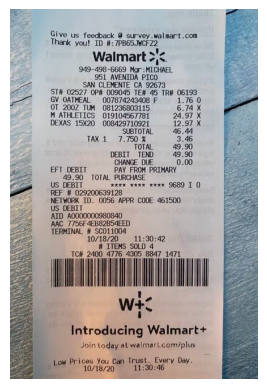

In [16]:
plt.imshow(cv2.imread("images/2.jpg"))
plt.axis('off')
print(out[1])

Name of store:HNY GRHS
Address of store:15
Total amount:7,000



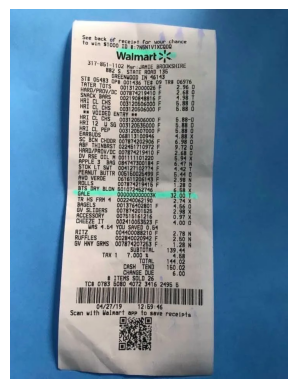

In [17]:
plt.imshow(cv2.imread("images/3.jpg"))
plt.axis('off')
print(out[2])

Name of store:Walmart
Address of store:3201 MANAWA CENTRE DR
Total amount:6.94T SUBTOTAL 694



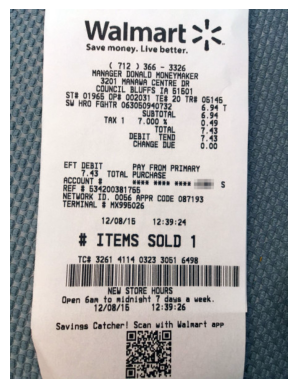

In [18]:
plt.imshow(cv2.imread("images/4.jpg"))
plt.axis('off')
print(out[3])

Name of store:WHOLE FOODs
Address of store:150 E Mc Kinley Ave Sunnyvale, CA 94086
Total amount:$28.28



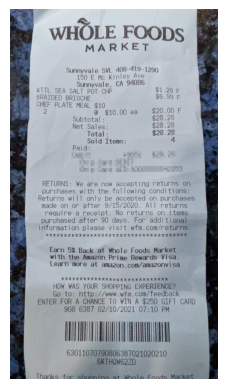

In [19]:
plt.imshow(cv2.imread("images/5.jpg"))
plt.axis('off')
print(out[4])

Name of store:Walmart
Address of store:2717 ROCK ISLAND PL BISMARCK ND 58504
Total amount:21.74



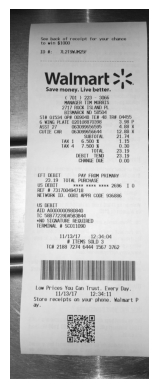

In [20]:
plt.imshow(cv2.imread("images/7.jpg"))
plt.axis('off')
print(out[5])

Name of store:Walmart
Address of store:01595
Total amount:7.000



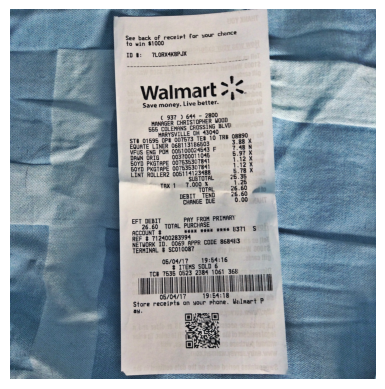

In [21]:
plt.imshow(cv2.imread("images/14.jpg"))
plt.axis('off')
print(out[6])

Name of store:Walmart
Address of store:2717 ROCK ISLAND PL BISMARCK ND 58504
Total amount:21.74



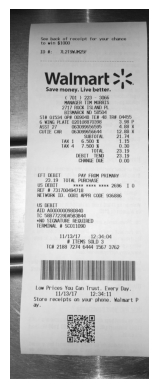

In [22]:
plt.imshow(cv2.imread("images/16.jpg"))
plt.axis('off')
print(out[7])

Name of store:Walmart
Address of store:1165 S CAMINO DEL RIO DURANGO CO 81303
Total amount:TAX 1 7,900



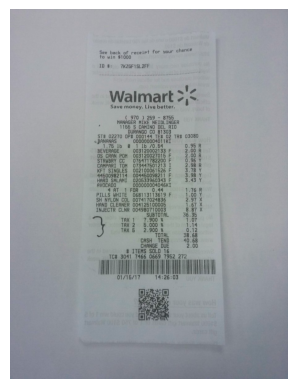

In [23]:
plt.imshow(cv2.imread("images/17.jpg"))
plt.axis('off')
print(out[8])